In [2]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
import matplotlib.cm as cm, matplotlib.font_manager as fm

df = pd.read_csv('D:/anaconda working/text/Lab06/summer-travel-gps-full.csv', encoding='utf-8', index_col='date', parse_dates=True)
rs = pd.read_csv('D:/anaconda working/text/Lab06/summer-travel-gps-dbscan.csv', encoding='utf-8')
df.head()

,lat,lon,city,country
date,,,,
2014-05-14 09:07:00,51.481292,-0.451011,West Drayton,United Kingdom
2014-05-14 09:22:00,51.474005,-0.450999,Hounslow,United Kingdom
2014-05-14 10:51:00,51.478199,-0.446081,Hounslow,United Kingdom
2014-05-14 11:24:00,51.478199,-0.446081,Hounslow,United Kingdom
2014-05-14 11:38:00,51.474146,-0.451562,Hounslow,United Kingdom


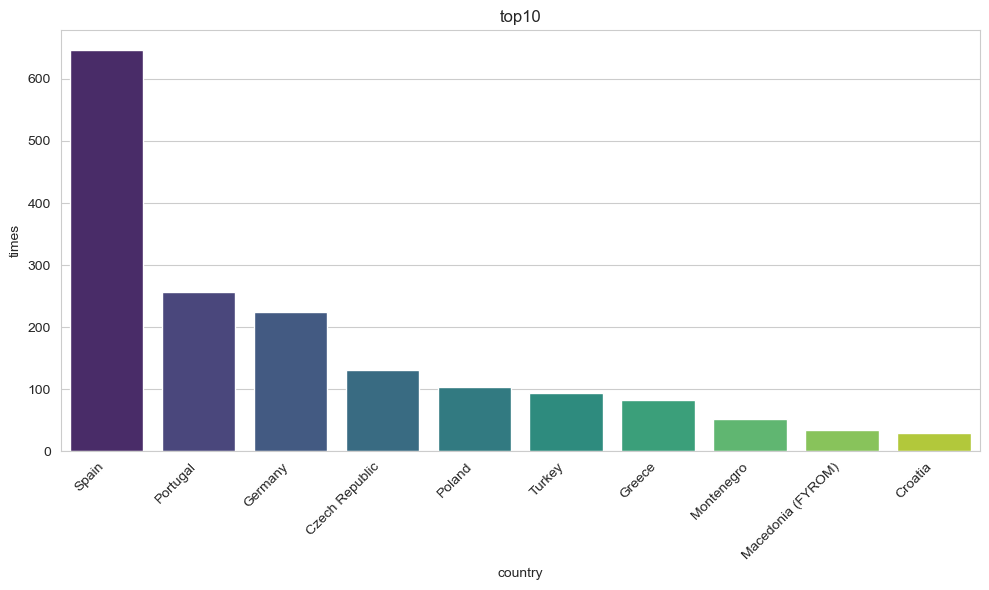

In [5]:
# Q1
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

country_visits = df['country'].value_counts()
top_countries = country_visits.head(10)
sns.set_style("whitegrid"
plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.index, y=top_countries.values, palette="viridis")
plt.xlabel("country")
plt.ylabel("times")
plt.title("top10")

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

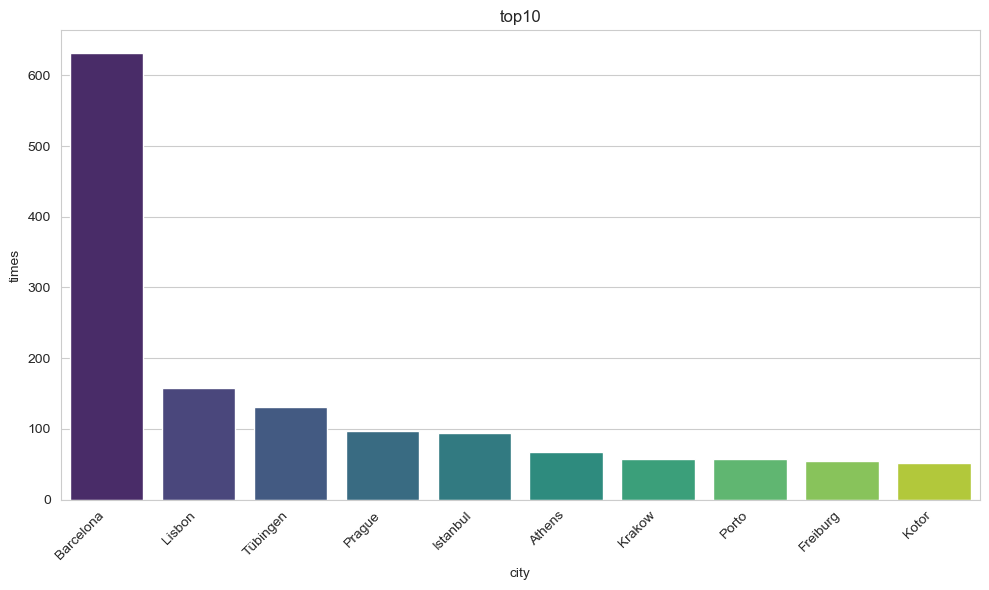

In [7]:
# Q2
city_visits = df['city'].value_counts()
top_cities = city_visits.head(10)
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x=top_cities.index, y=top_cities.values, palette="viridis")
plt.xlabel("city")
plt.ylabel("times")
plt.title("top10")

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

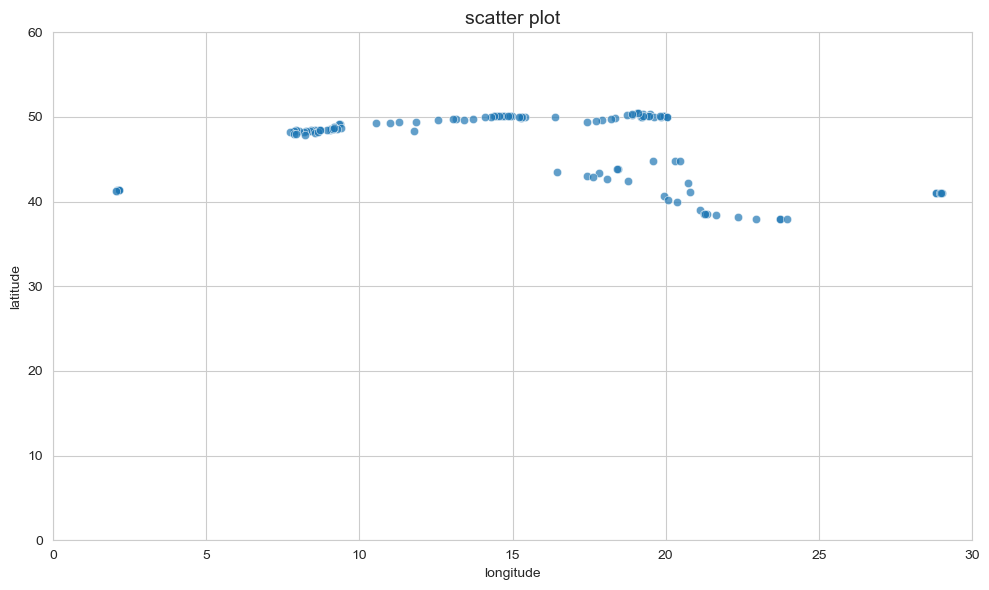

In [13]:
# Q3
plt.figure(figsize=(10, 6))
sns.scatterplot(x='lon', y='lat', data=rs, alpha=0.7)

plt.xlabel("longitude")
plt.ylabel("latitude")
plt.title("scatter plot", fontsize=14)
plt.xlim(0,30)
plt.ylim(0,60)

plt.tight_layout()
plt.show()

In [14]:
countdata = df.groupby(df.index.date).size()
countdata.head()

2014-05-14    36
2014-05-15    61
2014-05-16    57
2014-05-17    64
2014-05-18    50
dtype: int64

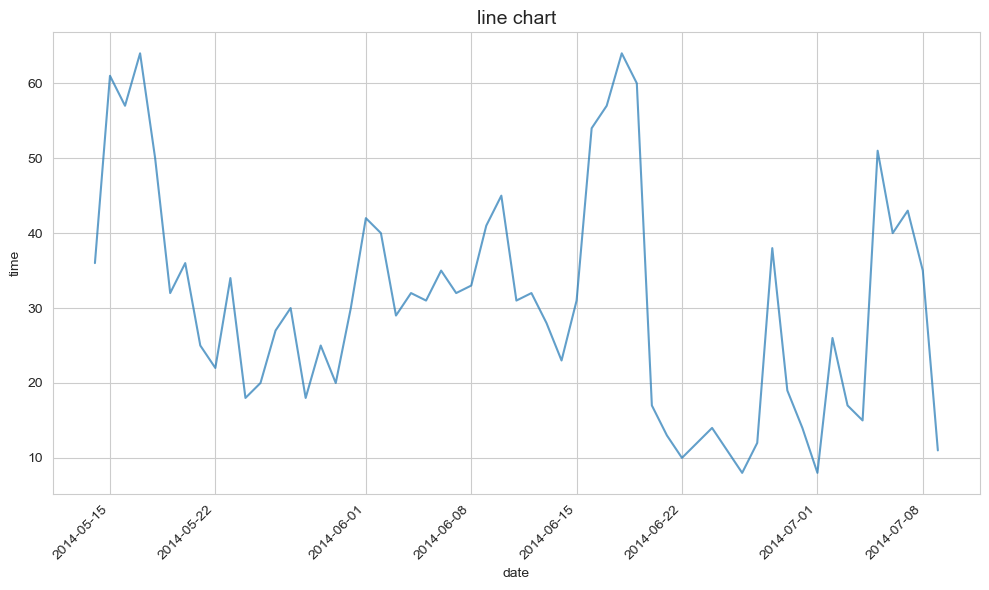

In [16]:
# Q4
plt.figure(figsize=(10, 6))
sns.lineplot(x=countdata.index, y=countdata.values, alpha=0.7)

plt.xlabel("date")
plt.ylabel("time")
plt.title("line chart", fontsize=14)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

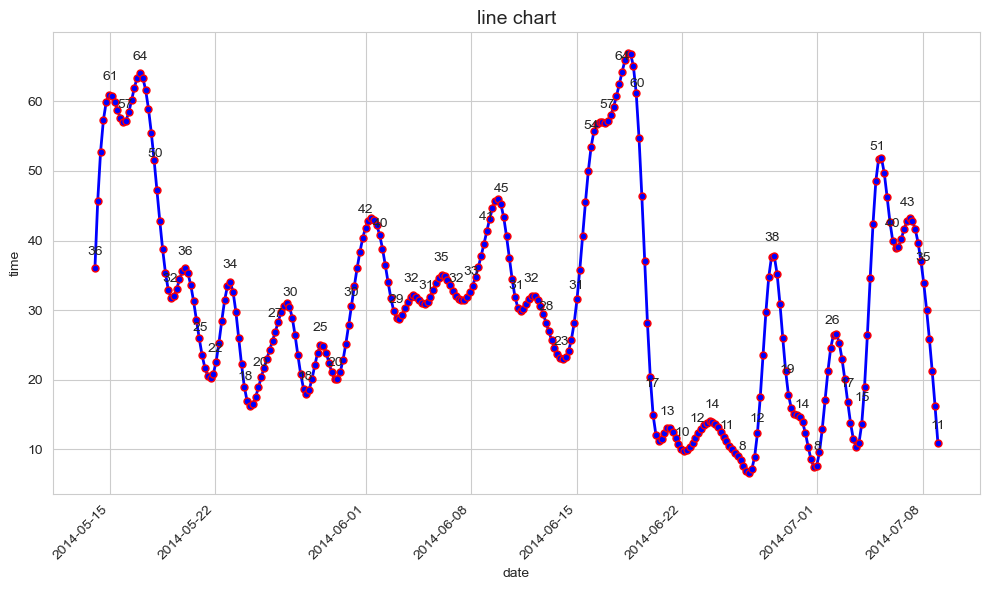

In [25]:
# Q5
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import make_interp_spline
import numpy as np
import matplotlib.dates as mdates

plt.figure(figsize=(10, 6))
x_values = mdates.date2num(countdata.index)
x_smooth = np.linspace(x_values.min(), x_values.max(), 300)
y_smooth = make_interp_spline(x_values, countdata.values)(x_smooth)
plt.plot(mdates.num2date(x_smooth), y_smooth, linewidth=2, color='blue', marker='o', markersize=5, markeredgecolor='red', markeredgewidth=1)

for i, txt in enumerate(countdata.values):
    plt.annotate(txt, (countdata.index[i], countdata.values[i]), textcoords="offset points", xytext=(0,10), ha='center')
    plt.xlabel("date")
    plt.ylabel("time")
    plt.title("line chart", fontsize=14)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [26]:
cities = df['city'].value_counts()
print(cities.count())
cities.head()

113


city
Barcelona    632
Lisbon       158
Tübingen     131
Prague        97
Istanbul      94
Name: count, dtype: int64

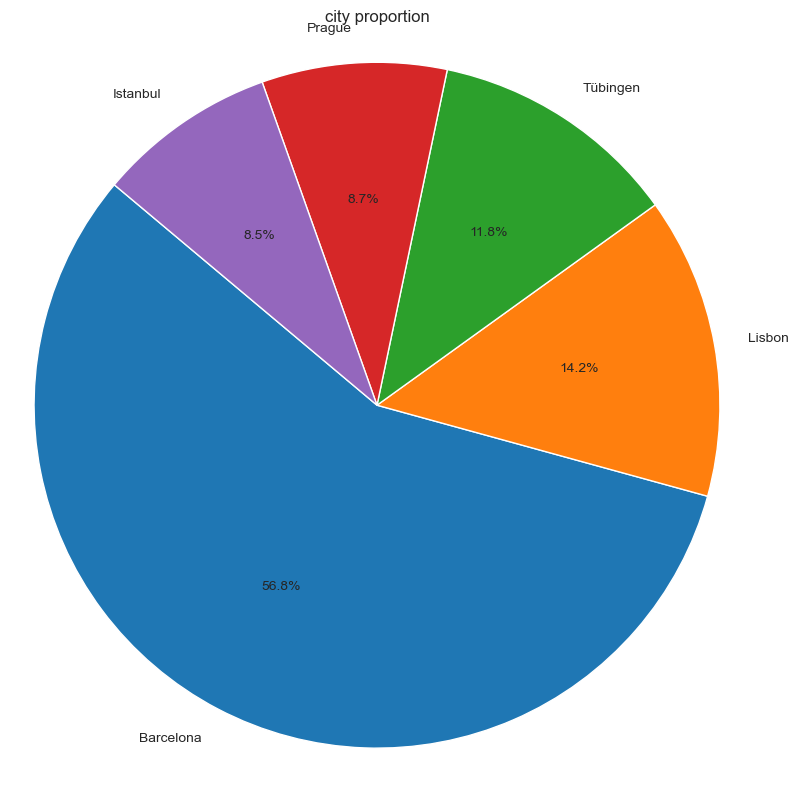

In [28]:
# Q6
city_counts = pd.Series({ 'Barcelona': 632, 'Lisbon': 158, 'Tübingen': 131, 'Prague': 97, 'Istanbul': 94})
cities = city_counts.index
counts = city_counts.values

plt.figure(figsize=(8, 8))
plt.pie(counts, labels=cities, autopct='%1.1f%%', startangle=140)

plt.title('city proportion')
plt.axis('equal')
plt.tight_layout()
plt.show()